In [70]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv("NEW.csv")

In [72]:
df.head()

,Age,BMI,BETA_HCG,TYROID,temp,bpm,stress,bp,AUTO_IMMUNE_DISEASE,SMOKING,GENETIC_PROBLEM,Target
0,31,30.363767,1486,3.962399,33,176,0,1,1,1,1,1
1,39,18.306052,35,2.500474,31,113,0,0,0,0,0,0
2,39,28.376224,822,4.079797,31,161,0,1,1,1,1,1
3,30,28.856667,33,2.480263,32,121,0,0,0,0,0,0
4,32,29.557745,1716,4.404689,30,113,0,1,1,1,1,1


In [73]:
df.tail()

,Age,BMI,BETA_HCG,TYROID,temp,bpm,stress,bp,AUTO_IMMUNE_DISEASE,SMOKING,GENETIC_PROBLEM,Target
9994,37,27.496951,1018,3.004938,29,186,0,1,1,1,1,1
9995,27,26.377908,704,3.501354,37,226,0,1,1,1,1,1
9996,30,19.865680,50,1.044641,37,115,0,0,0,0,0,0
9997,33,18.702156,49,0.106344,33,221,0,0,0,0,0,0
9998,37,25.701507,529,4.717163,30,143,0,1,1,1,1,1


In [74]:
df.size

119988

In [75]:
df.shape

(9999, 12)

In [76]:
df.columns

Index(['Age', 'BMI', 'BETA_HCG', 'TYROID', 'temp', 'bpm', 'stress', 'bp',
       'AUTO_IMMUNE_DISEASE', 'SMOKING', 'GENETIC_PROBLEM', 'Target'],
      dtype='object')

In [77]:
df['Target'].unique()

array([1, 0], dtype=int64)

In [78]:
df.dtypes

Age                      int64
BMI                    float64
BETA_HCG                 int64
TYROID                 float64
temp                     int64
bpm                      int64
stress                   int64
bp                       int64
AUTO_IMMUNE_DISEASE      int64
SMOKING                  int64
GENETIC_PROBLEM          int64
Target                   int64
dtype: object

In [79]:
df['Target'].value_counts()

0    5020
1    4979
Name: Target, dtype: int64

<AxesSubplot:>

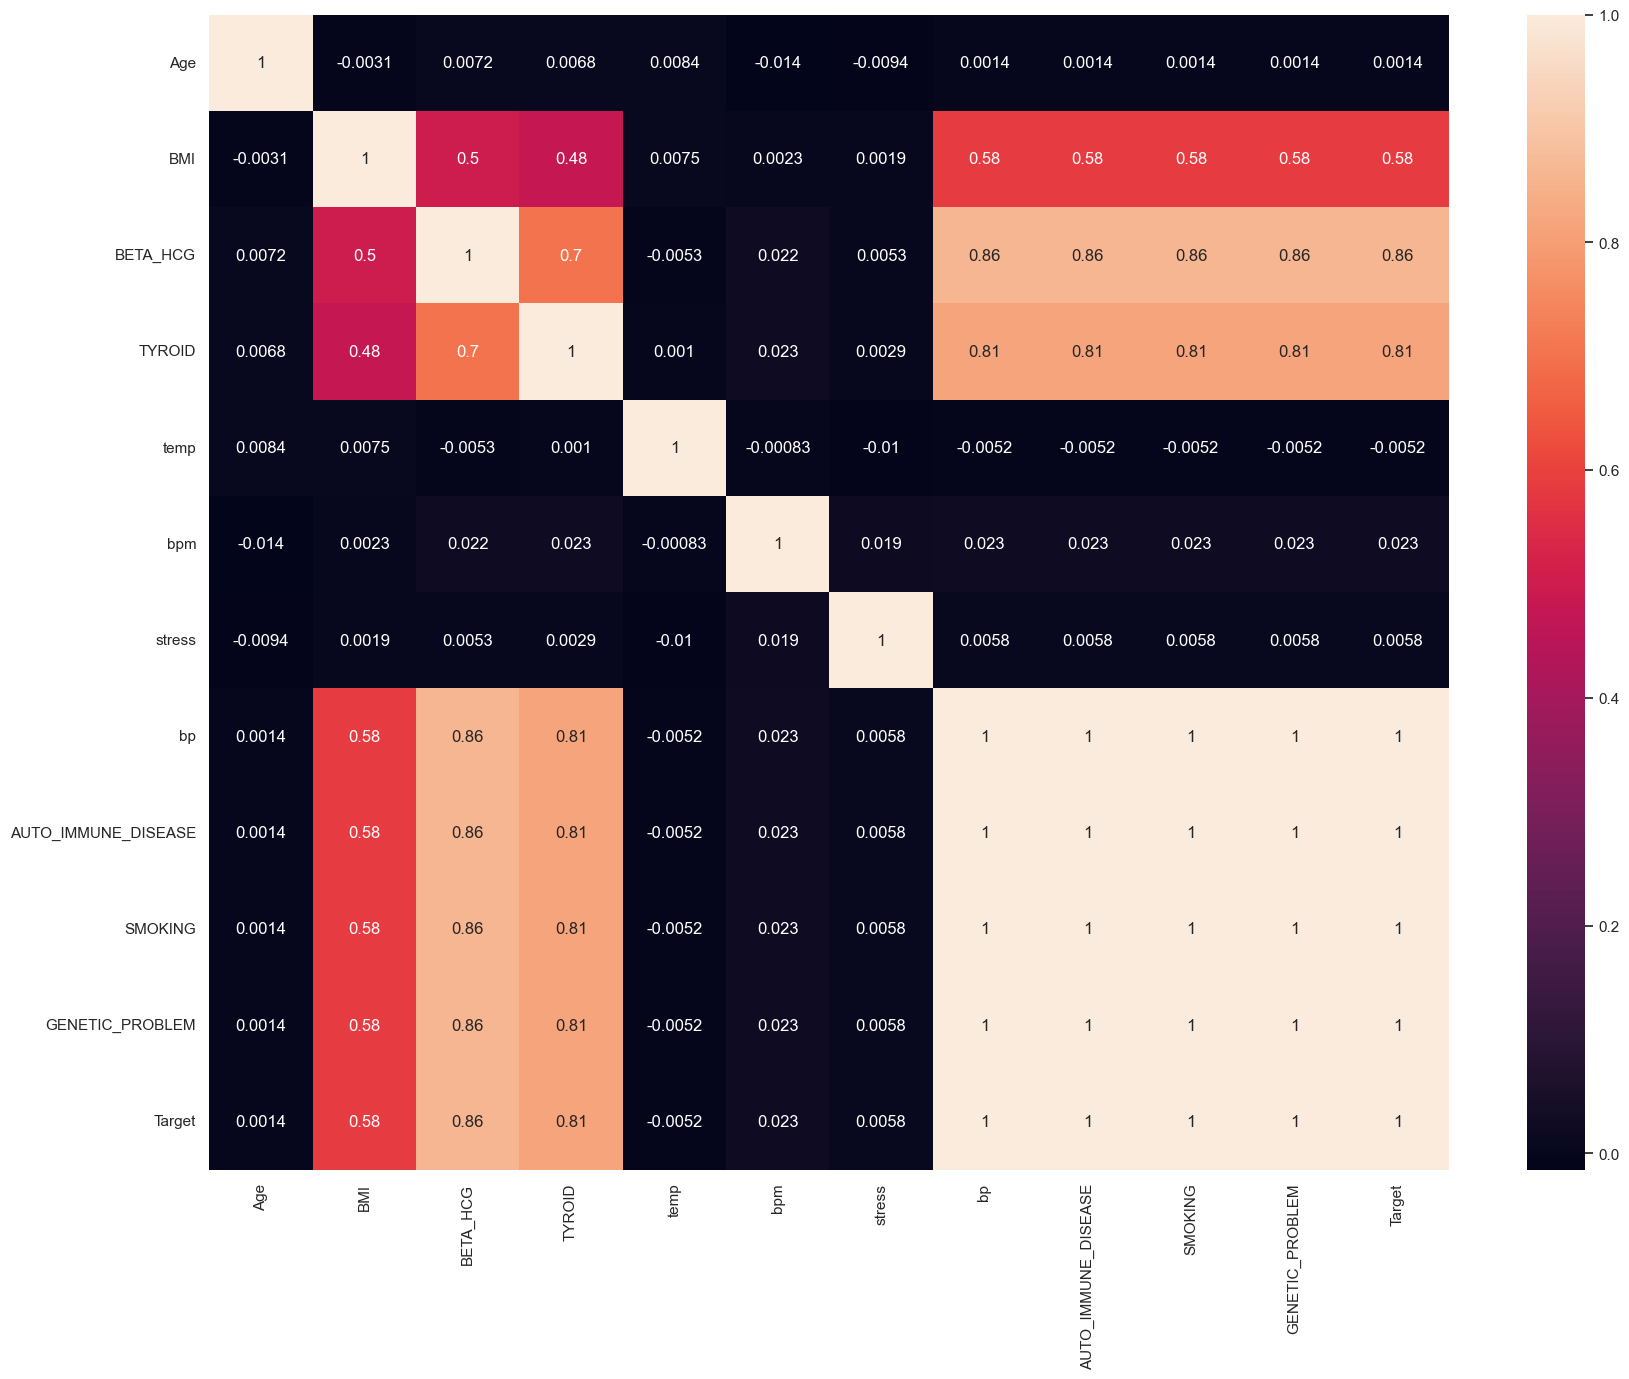

In [80]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

In [81]:
df.columns

Index(['Age', 'BMI', 'BETA_HCG', 'TYROID', 'temp', 'bpm', 'stress', 'bp',
       'AUTO_IMMUNE_DISEASE', 'SMOKING', 'GENETIC_PROBLEM', 'Target'],
      dtype='object')

### Seperating features and target label

In [82]:
features = df[['Age', 'BMI', 'BETA_HCG', 'TYROID', 'temp', 'bpm', 'stress', 'bp',
       'AUTO_IMMUNE_DISEASE', 'SMOKING', 'GENETIC_PROBLEM']]
target = df['Target']


In [83]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [84]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [88]:
score

array([1., 1., 1., 1., 1.])

### Saving trained Decision Tree model

In [89]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [91]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Guassian Naive Bayes model

In [92]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [93]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [94]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [95]:
#Saving trained SVM model

In [96]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [98]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Random Forest model

In [99]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'rf.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

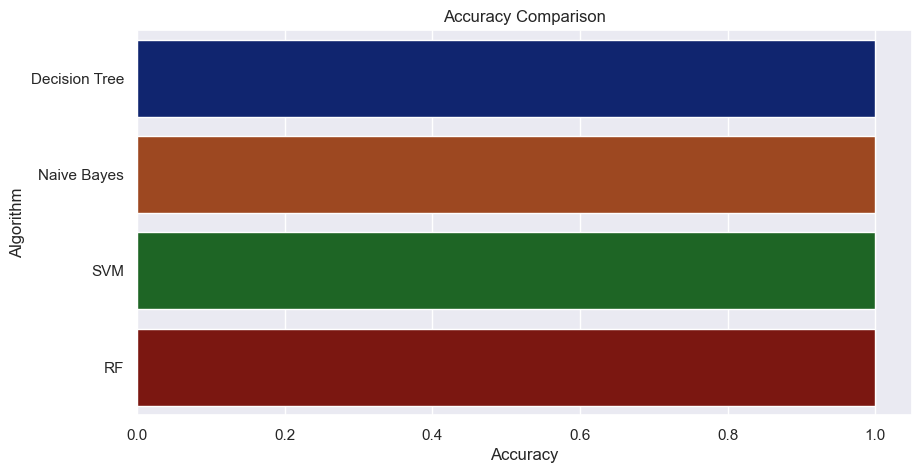

In [100]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [101]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 1.0
RF --> 1.0


## Making a prediction

In [102]:
data = np.array([[25,19.84126984,1486,3.96239946,33,103,0,2,1,1,1]])
prediction = RF.predict(data)
print(prediction[0])
res=prediction[0]
if res==1:
    print("MISSCARRIAGE FOUND")
else:
    print(" No MISSCARRIAGE ")

1
MISSCARRIAGE FOUND


In [103]:
data = np.array([[25,19.84126984,33,2.480263347,32,103,0,2,0,0,0]])
prediction = RF.predict(data)
print(prediction[0])
res=prediction[0]
if res==1:
    print("MISSCARRIAGE FOUND")
else:
    print(" No MISSCARRIAGE ")

0
 No MISSCARRIAGE 
